# SKLearn中的数据集
包括五大类
- 自带的小数据集,load
- svmlight/libsvm格式数据集,load_svmlight_file
- 可在线下载的数据集,fetch
- 计算机生成的数据集,make
- 从mldata.org下载的数据集,fetch_mldata

#1 自带的小数据集
- load_iris:鸢尾花数据集，多分类问题
- load_breast_cancer:乳腺癌数据集，二分类问题
- load_digits:手写数字数据集，多分类问题
- load_diabetes:糖尿病数据集，回归问题，已经被处理成0均值、方差归一化
- load_boston:波士顿房价数据集，回归问题
- load_linnerud:体能训练数据集，多变量任务回归
- load_sample_images(name):图像数据集


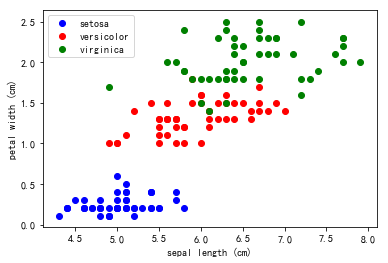

In [4]:
#鸢尾花
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
#鸢尾花数据集的特征有四个维度，这里只使用两个维度
x_index = 0
y_index = 3

colors = ['blue', 'red', 'green']
for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target == label, x_index],
                iris.data[iris.target == label, y_index],
                label=iris.target_names[label],c=color
    )
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend(loc='upper left')
plt.show()

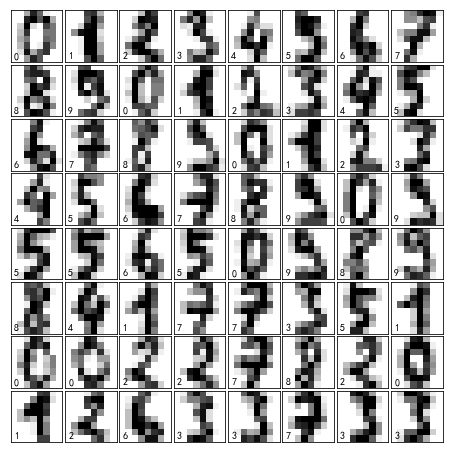

In [5]:
#手写数字
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
fig=plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8,8,i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0,7,str(digits.target[i]))
plt.show()

#2 计算机生成的数据集


##2.1 多类单标签
- make_blobs:多类单标签数据集，为每个类分配一个或多个正态分布的点集，提供了控制每个数据点集的参数：中心点，标准差，常用语聚类算法
- make_classification:多类单标签数据集，为每个类分配一个或多个正态分布的点集，提供了为数据集添加噪声的方式，包括纬度相关性，无效特征以及冗余特征等
- make_gaussian_quantiles:将一个单高斯分布的点集划分为两个数量均等的点集，作为两类
- make_moons：制造月亮型的数据集.一般用来测试非线性的分类器
- make_circles：制造同心圆的数据集.


/anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


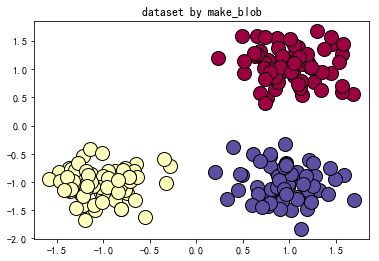

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

centers = [[1,1], [-1,-1], [1,-1]]#指定每个cluster的中心
cluster_std = 0.3

x, labels = make_blobs(n_samples=200, centers=centers, n_features=2, cluster_std=cluster_std, random_state=0)

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    x_k = x[labels == k]
    plt.plot(x_k[:,0], x_k[:, 1], 'o', markerfacecolor=col,markeredgecolor='k', markersize=14)
plt.title('dataset by make_blob')
plt.show()

/anaconda/lib/python3.5/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


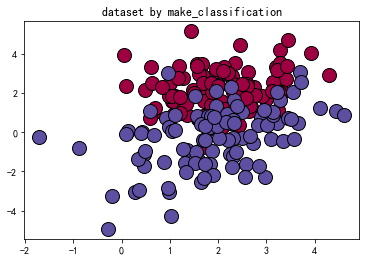

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_classification

x, labels = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, random_state=1,
                                n_clusters_per_class=1)
rng = np.random.RandomState(2)
x += 2 * rng.uniform(size=x.shape)

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    x_k = x[labels == k]
    plt.plot(x_k[:,0], x_k[:, 1], 'o', markerfacecolor=col,markeredgecolor='k', markersize=14)
plt.title('dataset by make_classification')
plt.show()

##2.2 多类多标签
- make_multilabel_classification:产生多标签随机样本。这些样本摸你了从很多话题的混合分布中抽取的词袋模型。每个文档的话题数量服从泊松分布，话题本身则从一个固定的随机分布中抽取出来。同样的，单词数量也是从泊松分布抽取，句子则是从多项式分布抽取

##2.3 用于回归任务
- make_regression：产生回归任务的数据集，期望目标输出是随机特征的稀疏随机线性组合，并且附带有噪声。

##2.4 用于流形学习的
- make_s_curve:S型曲线
- make_swiss_roll：瑞士卷